<a href="https://colab.research.google.com/github/sohagswe1/CNN_Fresh_Fruits/blob/main/210147_CNN_Fresh_Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Clone Your GitHub Repo (Automation Required)

In [1]:
!git clone https://github.com/sohagswe1/CNN_Fresh_Fruits.git


Cloning into 'CNN_Fresh_Fruits'...
remote: Enumerating objects: 3278, done.
remote: Counting objects: 100% (3278/3278), done.
remote: Compressing objects: 100% (3277/3277), done.
remote: Total 3278 (delta 0), reused 3278 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3278/3278), 31.59 MiB | 18.60 MiB/s, done.


## Step 2:Import OS



In [2]:
import os
os.listdir("CNN_Fresh_Fruits")


['Model', '.git', 'Custom']

In [3]:
import torch
device = torch.device("cpu")
print("Using device:", device)

Using device: cpu


## STEP 3: Import Libraries

In [4]:

import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image
from sklearn.metrics import confusion_matrix


## STEP 4: Data Preprocessing (Transforms)

In [5]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])




STEP 5: Load Standard Dataset (Fruits)

In [6]:
train_data = datasets.ImageFolder(
    "CNN_Fresh_Fruits/Model/train",
    transform=transform
)

print("Classes:", train_data.classes)
print("Num classes:", len(train_data.classes))



train_loader = DataLoader(
    train_data,
    batch_size=16,
    shuffle=True,
    num_workers=0
)


Classes: ['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']
Num classes: 10


STEP 6: Build CNN Model (PyTorch)

In [7]:
class CNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)
num_classes = len(train_data.classes)

model = CNN(num_classes)   # CPU model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model & optimizer created safely on CPU")


Model & optimizer created safely on CPU


STEP 7: Training Setup

In [8]:
model = CNN(num_classes)
print("Model created successfully")
print(model)

Model created successfully
CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


STEP 8: Training Loop (High Accuracy)

In [9]:
num_classes = len(train_data.classes)

model = CNN(num_classes)   # CPU model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model & optimizer created safely on CPU")


Model & optimizer created safely on CPU


In [16]:
epochs = 9  # small test first

train_loss = []  # store loss per epoch
train_acc = []   # store accuracy per epoch

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)   # CPU tensors only
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    avg_loss = total_loss / len(train_loader)
    acc = correct / total

    train_loss.append(avg_loss)  # save loss
    train_acc.append(acc)        # save accuracy

    print(f"Epoch {epoch+1} | Loss {avg_loss:.3f} | Acc {acc*100:.2f}%")



Epoch 1 | Loss 1.132 | Acc 58.97%
Epoch 2 | Loss 0.924 | Acc 66.84%
Epoch 3 | Loss 0.737 | Acc 74.27%
Epoch 4 | Loss 0.586 | Acc 80.05%
Epoch 5 | Loss 0.409 | Acc 86.40%
Epoch 6 | Loss 0.272 | Acc 91.31%
Epoch 7 | Loss 0.161 | Acc 95.22%
Epoch 8 | Loss 0.117 | Acc 97.00%
Epoch 9 | Loss 0.088 | Acc 98.00%


STEP 9: Save Model

In [18]:
import os
os.makedirs("CNN_Fresh_Fruits/model", exist_ok=True)
torch.save(model.state_dict(), "CNN_Fresh_Fruits/model/fruit_cnn.pth")
print("Model saved successfully")





Model saved successfully


STEP 10: Training History Plots

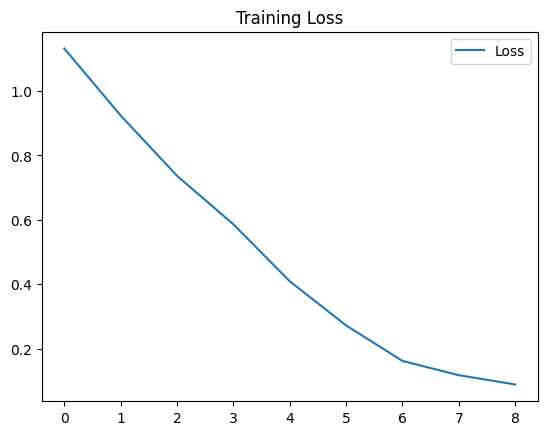

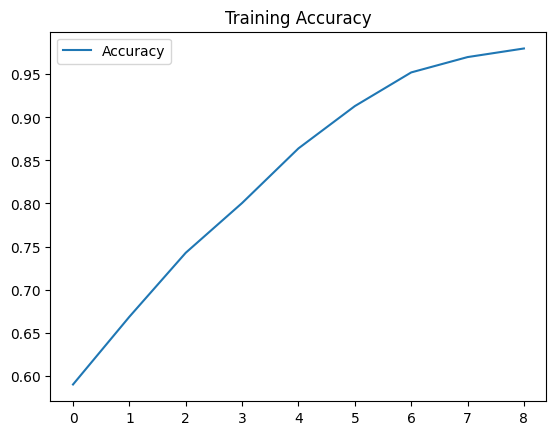

In [19]:
# Plotting
plt.plot(train_loss, label="Loss")
plt.legend()
plt.title("Training Loss")
plt.show()

plt.plot(train_acc, label="Accuracy")
plt.legend()
plt.title("Training Accuracy")
plt.show()



STEP 11: Confusion Matrix

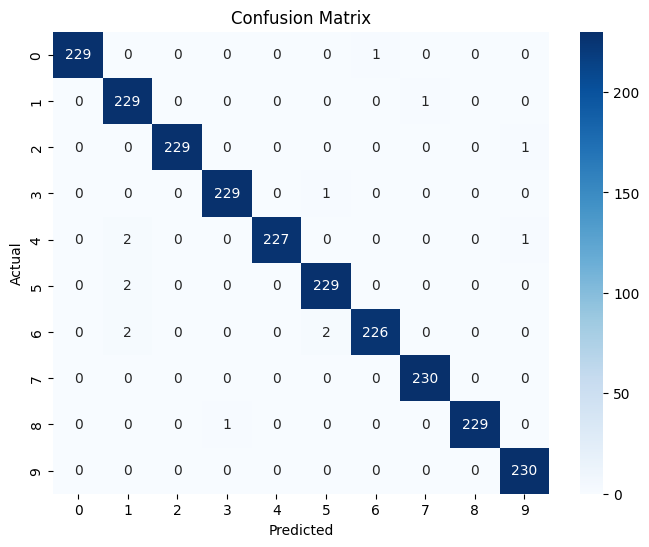

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# Step 1: Put model in evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():  # no gradient calculation
    for images, labels in train_loader:  # or train_loader
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 2: Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Step 3: Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



STEP 12: Real-World Prediction (Phone Images)

['banana.jpg', 'kiwi.png', 'mango.jpg', 'avocado.jpg', 'cherry.jpg', 'apple.jpg', 'watermelon.jpg', 'orange.jpg', 'pineapple.jpg', 'strawberry.jpg']


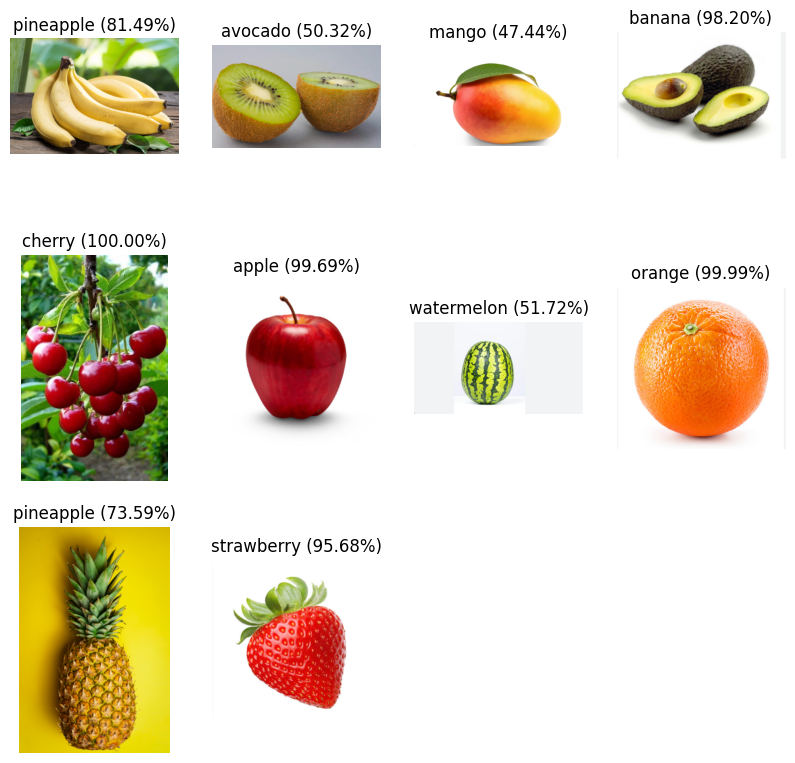

In [30]:
custom_path = "./CNN_Fresh_Fruits/Custom"  # update path to the correct folder
images = os.listdir(custom_path)
print(images)
class_names = ["apple", "avocado", "banana", "cherry", "kiwi",
               "mango", "orange", "pineapple", "strawberry", "watermelon"]

model.eval()

plt.figure(figsize=(10, 10))
for i, img_name in enumerate(images):
    img = Image.open(os.path.join(custom_path, img_name)).convert("RGB")
    img_t = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(img_t)
        prob = torch.softmax(output, dim=1)
        confidence, pred = torch.max(prob, 1)

    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(f"{class_names[pred]} ({confidence.item()*100:.2f}%)")
    plt.axis("off")

plt.show()


STEP 13: Visual Error Analysis

In [28]:
test_path = "CNN_Fresh_Fruits/Model/test"

test_data = datasets.ImageFolder(
    test_path,
    transform=transform
)

test_loader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=0
)

print("Test loader created successfully")
print("Test classes:", test_data.classes)


Test loader created successfully
Test classes: ['apple', 'avocado', 'banana', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'stawberries', 'watermelon']


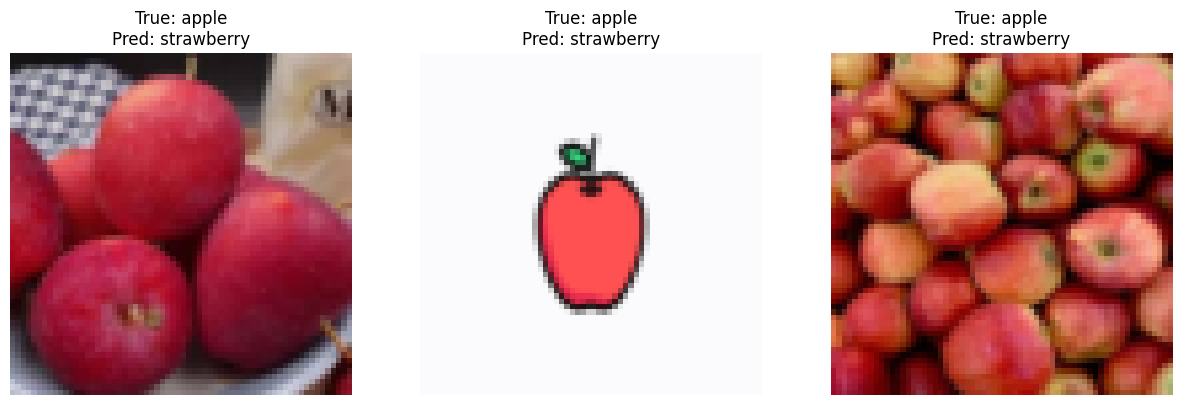

In [29]:
wrong = []
model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(len(labels)):
            if preds[i] != labels[i]:
                wrong.append((images[i], labels[i], preds[i]))
n = min(3, len(wrong))
plt.figure(figsize=(15, 5))

for i in range(n):
    img, t, p = wrong[i]
    plt.subplot(1, n, i+1)
    plt.imshow(img.permute(1,2,0))
    plt.title(f"True: {class_names[t]}\nPred: {class_names[p]}")
    plt.axis("off")

plt.show()



